# Gráficas con Matplotlib

La representación gráfica es una de las herramientas más potentes para explorar y visualizar funciones y datos, y, hoy en día, una de las tareas más importantes tanto para ingenieros como para científicos. De hecho, los gráficos se usan tanto para exponer como para entender datos y para comprobar visualmente resultados calculados.

El módulo de Python de mayor uso para la representación gráfica es **Matplotlib** (<http://matplotlib.org/>), que será, fundamentalmente, el que usaremos en este curso. Este módulo es muy potente y posee muchísimas funcionalidades. En esta sección nos limitaremos a su utilización para la representación de funciones de una variable. Para tener una idea de todas las posibilidades que ofrece este módulo podéis visitar la *Matplotlib Gallery* (https://matplotlib.org/stable/gallery/index.html).

## Uso de Matplotlib

Para usar **Matplotlib**, necesitamos importar su módulo. Puesto que lo usaremos a partir de la interfaz `pyplot`, también será necesario importar ésta:

In [17]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

'3.6.3'

Evidetemente, para realizar cálculos numéricos de forma eficiente, también será necesario importar el módulo **Numpy**:

In [18]:
import numpy as np

**Matplotlib** es una librería de Python que puede utilizarse fuera de los *Notebooks* Jupyter para representar gráficamente tanto funciones como entidades geométricas (ya sea por pantalla o para guardarlas en un fichero). Para que las representaciones gráficas aparezcan incrustadas en este documento usaremos el comando *mágico* `%matplotlib inline`. 
Por el contrario, si es necesario interactuar con las gráficas, deberíamos usar la opción `%matplotlib notebook`

In [19]:
%matplotlib inline

## Gráficas de funcións de una variable

Las gráficas de funciones de una variable se crean a partir de la evaluación del valor de la función en un gran número de puntos almacenados en un vector **Numpy**. Al usar un número de puntos suficiente, se crea un efecto cinematográfico, y la gráfica de la función parecerá suave. Sin embargo, hay que entender que lo que se está representando gráficamente es una concatenación de segmentos rectos que unen los puntos evaluados. Por ejemplo, para representar las funciones

$$
f(x) = \sin(x),\qquad g(x)=\cos(x),\qquad x\in[0,4\pi].
$$
el primer paso será crear un vector de valores en los que se evalúe la función. Para eso, se utiliza la función `np.linspace` como sigue:

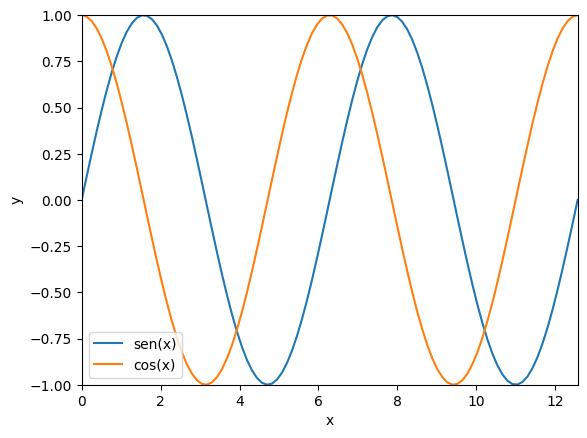

In [20]:
# Creación de los puntos donde se evalúa la función
x = np.linspace(0, 4*np.pi, 100)

# Gráfica de sin(x) y cos(x), con una etiqueta para cada una
plt.plot(x, np.sin(x), label='sen(x)')
plt.plot(x, np.cos(x), label='cos(x)')

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Añadir la leyenda (mostrando las etiquetas de los "plot")
plt.legend()

# Definir los límites de los ejes x e y
plt.xlim(x[0], x[-1])
plt.ylim([-1.,1.])

plt.show()

Para representar gráficos de funciones con **Matplotlib** hay muchas opciones, que puedes ver aquí:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Por ejemplo:

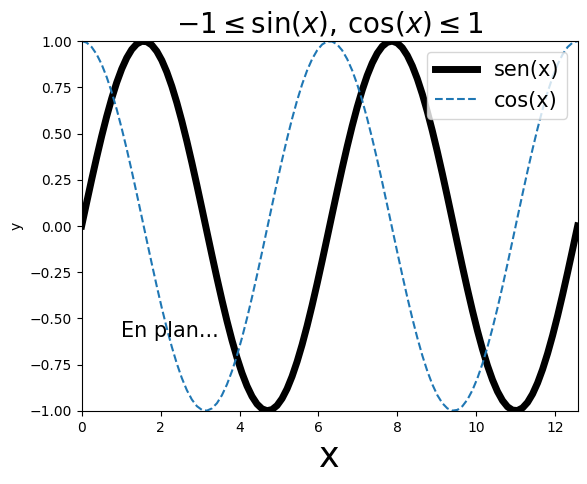

In [21]:
# Creación de los puntos en los que se evalúa la función
x = np.linspace(0, 4*np.pi, 100)

# Gráfica de sin(x) y cos(x), con una etiqueta para cada una
# Dibujamos la del "seno" más gruesa y en negro. La del "coseno" en línea punteada
plt.plot(x, np.sin(x), label='sen(x)', lw='5', c='black')
plt.plot(x, np.cos(x), label='cos(x)', ls='--')

# Etiquetas de los ejes (la "X" con una fuente más grande)
plt.xlabel('x', fontsize=25)
plt.ylabel('y')

# Añadimos textos "explicativos" donde nos parezca mejor
plt.title(r'$-1\leq\sin(x), \, \cos(x)\leq 1$', fontsize=20)
plt.text(1, -0.6, r'En plan...', fontsize=15)

# Añadimos la etiqueta de cada función
# La colocamos en la esquina superior derecha
plt.legend(loc='upper right',fontsize=15)

# Definimos los límites de los ejes x e y
plt.xlim(x[0], x[-1])
plt.ylim([-1.,1.])

plt.show()

Si queremos un gráfico con varios subgráficos:

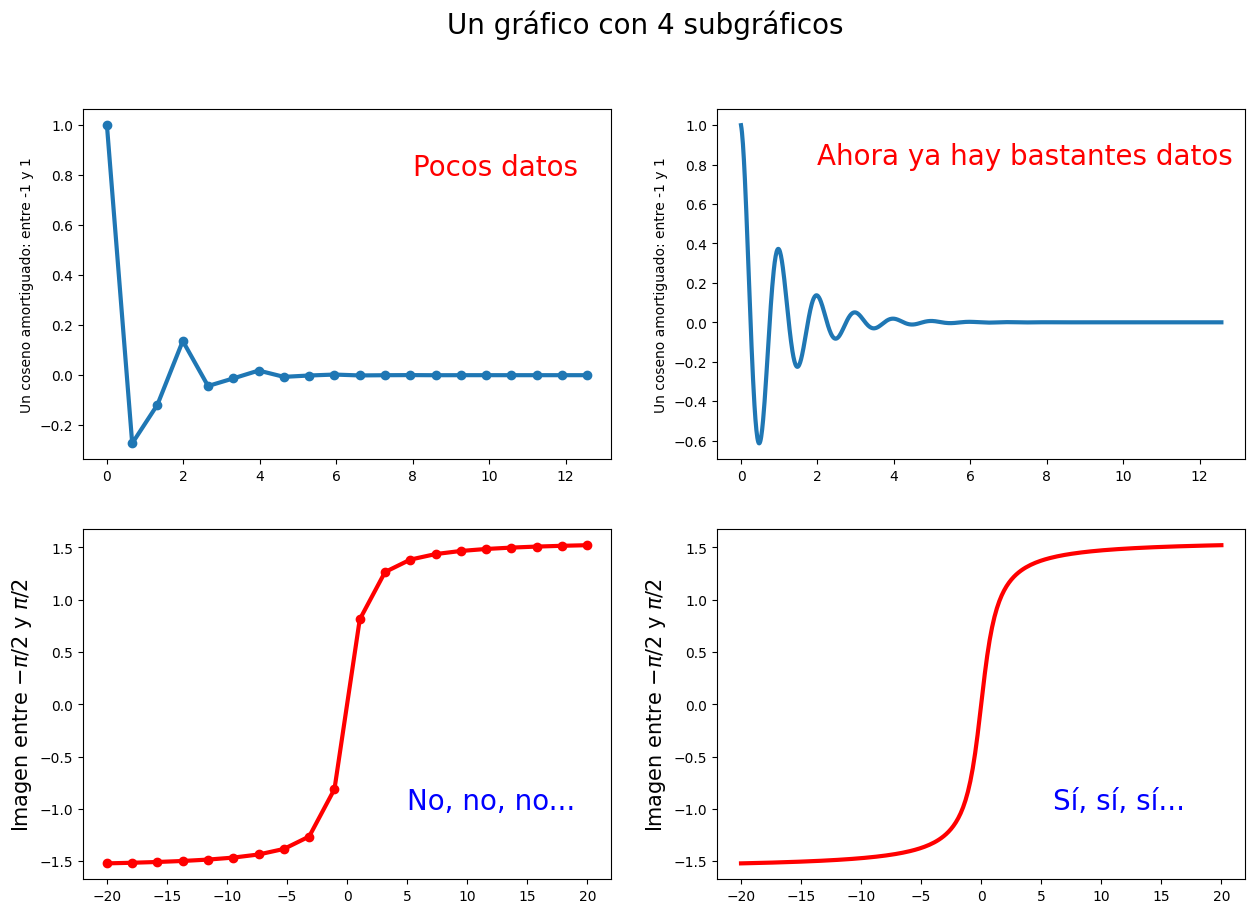

In [22]:

# Creamos gráficos de funciones
x1 = np.linspace(0.0, 4*np.pi, 20)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 4*np.pi, 1000)
y2 = np.cos(2 * np.pi * x2) * np.exp(-x2)
x3 = np.linspace(-20.0, 20.0, 20)
y3 = np.arctan(x3)
x4 = np.linspace(-20.0, 20.0, 200)
y4 = np.arctan(x4)

fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Un gráfico con 4 subgráficos', fontsize=20)

ax1 = axs[0,0]
ax1.plot(x1, y1, 'o-', lw='3')
ax1.set_ylabel('Un coseno amortiguado: entre -1 y 1', fontsize=10)
ax1.text(8, 0.8, 'Pocos datos', c='r', fontsize=20)

ax2 = axs[0,1]
ax2.plot(x2, y2, '-', lw='3')
ax2.set_ylabel('Un coseno amortiguado: entre -1 y 1', fontsize=10)
ax2.text(2, 0.8, 'Ahora ya hay bastantes datos', c='r', fontsize=20)

ax3 = axs[1,0]
ax3.plot(x3, y3, 'o-', c='r', lw='3')
ax3.set_ylabel('Imagen entre $-\pi/2$ y $\pi/2$', fontsize=15)
ax3.text(5, -1, 'No, no, no...', c='b', fontsize=20)

ax4 = axs[1,1]
ax4.plot(x4, y4, c='r',  lw='3')
ax4.set_ylabel('Imagen entre $-\pi/2$ y $\pi/2$', fontsize=15)
ax4.text(6, -1, 'Sí, sí, sí...', c='b', fontsize=20)

plt.show()

## Uso de **sp.lambdify** 

En el resto de esta práctica, así como en el resto del curso, necesitaremos que una función simbólica de **Sympy** actúe sobre variables que almacenen números en coma flotante o arrays de **Numpy**. En concreto, y aunque las utilidades de este comando son mucho más amplias, lo necesitaremos para representar las funciones obtenidas en **Matplotlib**. 

Esto se consigue utilizando la función `sp.lambdify`.

Mostramos a continuación, sobre un ejemplo, su uso. En él denotaremos *f* la función en Sympy y *fn* la función numérica generada a partir de ésta con `sp.lambdify`.

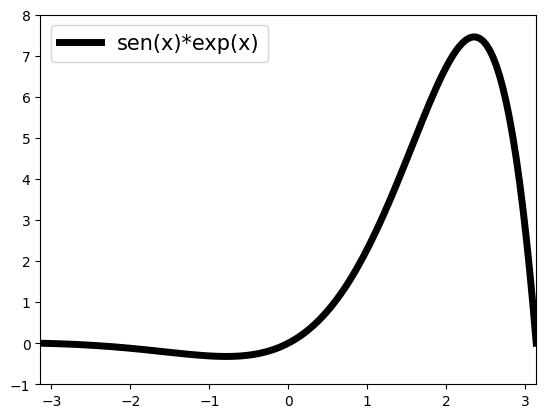

In [24]:
import sympy as sp
import numpy as np
x=sp.symbols('x')
# La funcion f es simbolica: no podemos evaluarla
# en variables numericas que almacenen valores en coma flotante, 
# o en arrays de numpy
f_exp = sp.sin(x)*sp.exp(x)
# La funcion fn es numerica, y podemos evaluarla en numeros en coma flotante o en arrays de Numpy
fn = sp.lambdify(x,f)

# Ahora, para representarla con matplotlib, la evaluamos en un array de puntos
x=np.linspace(-np.pi,np.pi,150)
# print(fn(x))

plt.plot(x, fn(x), label='sen(x)*exp(x)', lw='5', c='black')
plt.legend(loc='upper left',fontsize=15)
# Definimos los límites de los ejes x e y
plt.xlim(x[0], x[-1])
plt.ylim([-1.,8.])
plt.show()

Os dejamos que juguéis un poquito con `Matplolib`...
